# Datenbasis-Analyse für die Masterarbeit

Dieses Notebook dient der exemplarischen Darstellung von zwei ausgewählten Logos und deren zugehörigen Metadaten. Die hier präsentierten Daten sind Teil der Grundlage für das Training des Diffusionsmodells.

In [2]:
import pandas as pd
from PIL import Image
from IPython.display import display, HTML
import os

# --- Konfiguration ---
METADATA_PATH = '../output/amazing_logos_v4/data/amazing_logos_v4_cleanup/metadata.csv'
IMAGE_DIR = '../output/amazing_logos_v4/images/balanced_sample_2k_512x512'
IDS_TO_DISPLAY = ['amazing_logo_v4000185', 'amazing_logo_v4054788']

# --- Daten laden ---
try:
    df = pd.read_csv(METADATA_PATH)
    print("Metadaten erfolgreich geladen.")
except FileNotFoundError:
    print(f"Fehler: Die Datei {METADATA_PATH} wurde nicht gefunden.")
    df = None

Metadaten erfolgreich geladen.


In [3]:
df

,id,text
0,amazing_logo_v4000000,"Simple elegant logo for Mandarin Oriental, Fan..."
1,amazing_logo_v4000001,"Simple elegant logo for Alfa, Hexagon Poland T..."
2,amazing_logo_v4000002,"Simple elegant logo for Kuraray, G Japan K Out..."
3,amazing_logo_v4000003,"Simple elegant logo for Valwood Park, Lines Ro..."
4,amazing_logo_v4000004,"Simple elegant logo for Cinepaq, C Circle Film..."
...,...,...
397246,amazing_logo_v4397246,"Simple elegant logo for Peak2Pacific, Wave Mou..."
397247,amazing_logo_v4397247,"Simple elegant logo for VisionOttica, eye Peop..."
397248,amazing_logo_v4397248,"Simple elegant logo for Elite Angling, fishing..."
397249,amazing_logo_v4397249,"Simple elegant logo for Jacki M's & Son, Logo ..."


Text:,"Simple elegant logo for Santa Fe By Design, Drop Oval United states Water, Manufacturing, successful vibe, minimalist, thought-provoking, abstract, recognizable, relatable, sharp, vector art, even edges, black and white"
Text:,"Simple elegant logo for Aziz Firaat, Read Book Tick Checkmark Todo List, Website, successful vibe, minimalist, thought-provoking, abstract, recognizable, relatable, sharp, vector art, even edges"

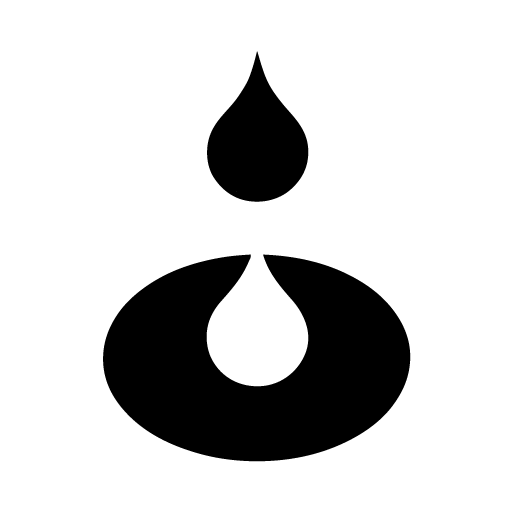
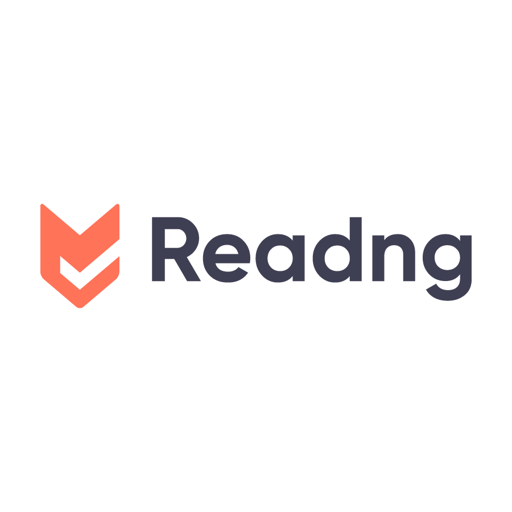

In [3]:
# --- Daten filtern und anzeigen ---
if df is not None:
    # Filtern des DataFrames, wenn 'id' eine normale Spalte ist
    filtered_df = df[df['id'].isin(IDS_TO_DISPLAY)]

    # Deutsche Bezeichnungen für die Spalten
    column_labels = {
        'text': 'Text',
    }

    # Container für die nebeneinander liegenden Logos
    html_str = "<div style='display: flex; justify-content: center; align-items: flex-start;'>"

    # Iteration über die gefilterten Zeilen
    for index, row in filtered_df.iterrows():
        logo_id = row['id']  # ID aus der 'id'-Spalte holen
        image_path = os.path.join(IMAGE_DIR, f"{logo_id}.png")
        
        # Bild laden und für HTML vorbereiten
        try:
            img = Image.open(image_path)
            # Bild in Base64 umwandeln, um es direkt einzubetten
            from io import BytesIO
            import base64
            buffered = BytesIO()
            img.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()
            img_html = f"<img src='data:image/png;base64,{img_str}' style='width: 256px; border: 1px solid #ccc; border-radius: 8px;'/>"
        except FileNotFoundError:
            img_html = "<p style='color: red;'>Bild nicht gefunden</p>"

        # Metadaten formatieren
        meta_html = "<div style='margin-top: 0px; font-family: Arial, sans-serif; font-size: 18px;'>"
        meta_html += "<table style='border-collapse: collapse; width: 100%;'>"
        
        # Dynamisch durch alle Spalten iterieren
        for col_name, col_value in row.items():
            if col_name == 'id':
                continue  # ID-Spalte überspringen
            
            # Deutsche Bezeichnung verwenden, falls vorhanden, sonst den Spaltennamen
            label = column_labels.get(col_name, col_name.capitalize())
            
            # Den Wert kursiv formatieren, wenn es die Beschreibung ist
            value_display = f"<i>{col_value}</i>" if col_name == 'desription' else col_value
            
            meta_html += f"<tr><td style='padding: 4px; border: 1px solid #ddd;'><b>{label}:</b></td><td style='padding: 4px; border: 1px solid #ddd;'>{value_display}</td></tr>"
            
        meta_html += "</table>"
        meta_html += "</div>"

        # Alles zusammenfügen in einem Container pro Logo
        html_str += "<div style='display: flex; flex-direction: column; align-items: center; margin: 0px; padding: 10px; align-content: center; gap: 4px'>"
        html_str += img_html
        html_str += meta_html
        html_str += "</div>"

    html_str += "</div>"
    display(HTML(html_str))